# Relationship between DTFT and DFT

In [2]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from scipy.fftpack import fft, ifft, fftfreq, fftshift
import cmath
import pandas as pd
j = complex(0,1)

Running Python: 3.8.19
Running Sympy: 1.12.1


In [3]:
N = 16
K = np.arange(N)    # index list

# create a discrete time signal that is nonzero for 0,...,2N1 
N1 = 2
x = K*0
x[K <= 2*N1] = 1 

In [5]:
WN = np.exp(-j*(2*np.pi/N))
W = WN ** np.outer(K,K)  # for DFT
X = W @ x
Xmag = np.abs(X)        
Xshift = np.append(Xmag[N//2+1:N],Xmag[0:N//2+1])/N
Nshift = np.arange(-N//2+1,N//2+1)

# From notes, the predicted response is given by
Omega = np.arange(0,2*np.pi,1/1000)
Xpred = np.exp(-j*Omega*N1)*np.sin(Omega*(N1+0.5))/np.sin(Omega/2)

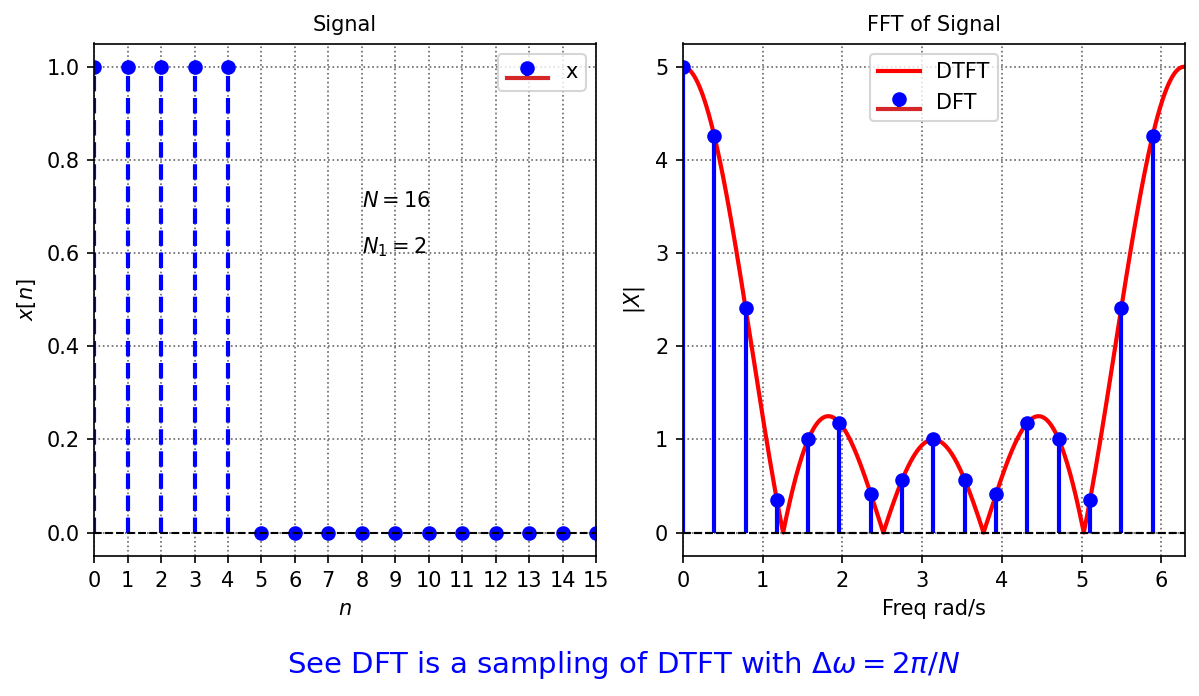

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout()
#ax1.stem(K, x,'bs--',label='x')
markerline, stemlines, baseline = ax1.stem(K, x,linefmt='b--',markerfmt='bo',label='x')
ax1.set_ylabel('$x[n]$')
ax1.set_xlabel('$n$')
ax1.set_title('Signal')
ax1.legend()
ax1.set_xticks(np.arange(N))
nicegrid(ax1)
plt.setp(baseline, visible=False)

ax2.plot(Omega,np.abs(Xpred),'r-',label='DTFT')

omega = (2*np.pi/N)*K
markerline, stemlines, baseline = ax2.stem(omega, Xmag,linefmt='b',markerfmt='bo',label='DFT')
ax2.set_title('FFT of Signal')
ax2.set_ylabel('$|X|$')
ax2.set_xlabel('Freq rad/s')
ax2.set_xlim(0,2*np.pi+0.01)
ax1.text(8,.7,'$N=$'+str(N))
ax1.text(8,.6,'$N_1=$'+str(N1))
nicegrid(ax2)
ax2.legend()
nicegrid()
plt.setp(baseline, visible=False)
caption("See DFT is a sampling of DTFT with $\Delta \omega = 2 \pi/N$",fig)
fig.savefig('./figs/T8_ex8_1.pdf', dpi=300)

In [7]:
N = 32
K = np.arange(N)    # index list
WN = np.exp(-j*(2*np.pi/N))
W = WN ** K  # for DFT

N1 = 4
x = K*0
x[K <= 2*N1] = 1 

X=[]
for ii in np.arange(N):
    X = np.append(X,np.dot(W**ii,x))
Xmag = np.abs(X)        
Xshift = np.append(Xmag[N//2+1:N],Xmag[0:N//2+1])/N
Nshift = np.arange(-N//2+1,N//2+1)

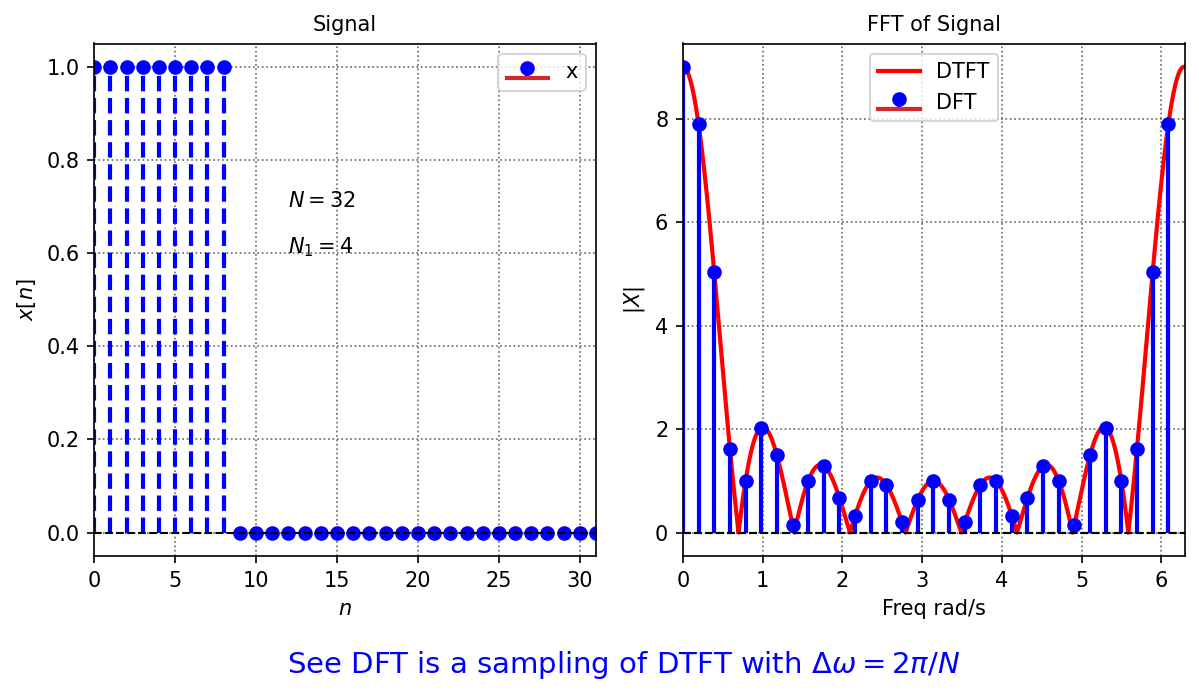

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout()
#ax1.stem(K, x,'bs--',label='x')
markerline, stemlines, baseline = ax1.stem(K, x,linefmt='b--',markerfmt='bo',label='x')
ax1.set_ylabel('$x[n]$')
ax1.set_xlabel('$n$')
ax1.set_title('Signal')
ax1.legend()
nicegrid(ax1)
plt.setp(baseline, visible=False)

Omega = np.arange(0,2*np.pi,1/1000)
Xpred = np.exp(-j*Omega*N1)*np.sin(Omega*(N1+0.5))/np.sin(Omega/2)
ax2.plot(Omega,np.abs(Xpred),'r-',label='DTFT')

omega = (2*np.pi/N)*K
markerline, stemlines, baseline = ax2.stem(omega, Xmag,linefmt='b',markerfmt='bo',label='DFT')
ax2.set_title('FFT of Signal')
ax2.set_ylabel('$|X|$')
ax2.set_xlabel('Freq rad/s')
ax2.set_xlim(0,2*np.pi+0.01)
ax1.text(12,.7,'$N=$'+str(N))
ax1.text(12,.6,'$N_1=$'+str(N1))
nicegrid(ax2)
ax2.legend()
nicegrid()
plt.setp(baseline, visible=False)
caption("See DFT is a sampling of DTFT with $\Delta \omega = 2 \pi/N$",fig)
fig.savefig('./figs/T8_ex8_2.pdf', dpi=300)